# Проверка гипотез для увеличения выручки интернет-магазина. Анализ результатов A/B-теста

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.

Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

<b> Цель исследования:</b> подготовка и проверка гипотез для увеличения выручки

В первую очередь загрузим все необходимые библиотеки

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
import scipy.stats as stats
pd.set_option('display.max_colwidth', 0)

## Часть 1. Приоритезация гипотез

### Предобработка данных

Загрузим таблицу с гипотезами и посмотрим основную информацию по ней.

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis.head(10))
display(hypothesis.tail(10))
hypothesis.info()
hypothesis.value_counts().sum()
print(hypothesis.isna().sum())
print('Количество дубликатов:', hypothesis.duplicated().sum()) 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
Количество дубликатов: 0


Пропусков нет, дубликатов тоже, все типы данных верные, можно привести названия столбцов к нижнему регистру для удобства.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE

Приоритизируем гипотезы используя фреймворк ICE

In [5]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_ice = hypothesis[['hypothesis','ICE']].sort_values('ICE', ascending=False).round(2) # отсортируем по убыванию приоритета

hypothesis_ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее приоритетные гипотезы: 8, 0 и 7.

Наименее приоритетные 5, 3 и 4.

### Фреймворк RICE

Приоритизируем гипотезы используя фреймворк RICE

In [6]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_rice = hypothesis[['hypothesis','RICE']].sort_values('RICE', ascending=False).round(2) # отсортируем по убыванию приоритета
hypothesis_rice

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее приоритетные гипотезы: 7, 2 и 0.

Наименее приоритетные 1, 5 и 4.

Приоритизация гипотез изменилась, это связано с тем, что фреймворк RICE имеет параметр Reach учитывающий количество пользователей, которых затронет изменение. Гипотезы 7 и 2 затрагивают изменения главных страниц сайта, а значит и абсолютное большинство пользователей, в свою очередь гипотеза 8 сместилась с первого места на пятое, так как это изменение по большому счёту затрагивает только постоянных пользователей.

## Часть 2. Анализ A/B-теста

### Предобработка данных

Загрузим датафрейм orders и посмотрим основную информацию о нём.

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head(10))
display(orders.tail(10))
orders.info()
orders.value_counts().sum()
print(orders.isna().sum())
print('Количество дубликатов:', orders.duplicated().sum()) 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество дубликатов: 0


Пропусков и дубликатов нет. Приведём столбец date к формату datetime, а также изменим приведём названия столбцов к змеиному регистру.

In [8]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Всё в порядке, теперь перейдём к следующему датафрейму

Загрузим датафрейм visitors и посмотрим основную информацию о нём.

In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head(10))
display(visitors.tail(10))
visitors.info()
visitors.value_counts().sum()
print(visitors.isna().sum())
print('Количество дубликатов:', visitors.duplicated().sum()) 

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


,date,group,visitors
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
date        0
group       0
visitors    0
dtype: int64
Количество дубликатов: 0


Пропусков и дубликатов нет, приведём столбец date к типу данных datetime.

In [10]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим группы в тесте

In [11]:
print (orders['group'].unique())
print (visitors['group'].unique())
g_a = orders[orders['group'] == 'A']['visitor_id']
g_b = orders[orders['group'] == 'B']['visitor_id']
orders_ab = orders.query('visitor_id in @g_a and visitor_id in @g_b')
print ('Количество пользователей в группе А:', g_a.nunique())
print ('Количество пользователей в группе B:', g_b.nunique())
print ('Общее число пользователей:', orders['visitor_id'].nunique())
print('Количество пользователей в двух группах:', orders_ab['visitor_id'].nunique())

['B' 'A']
['A' 'B']
Количество пользователей в группе А: 503
Количество пользователей в группе B: 586
Общее число пользователей: 1031
Количество пользователей в двух группах: 58


Проверив группы, мы можем заметить, что количество пользователей в группе B больше на 83.

Также 58 пользователей попали в обе группы, но их количество составляет менее 1 процента от общего числа, это вполне допустимо.

Можно переходить непосредственно к анализу A/B-теста.

### Кумулятивная выручка по группам.

Для построения графика кумулятивной выручки по группам: 
1) Создадим датафрейм datesGroups, куда войдут уникальные пары значений стольцов 'group' и 'date' таблицы orders.

2) Объявим переменную, в которой соберём агрегированные кумулятивные по дням данные о заказах.

3) Объявим переменную, в которой соберём агрегированные кумулятивные по дням данные о посетителях.

4) Объединим кумулятивные данные в одной таблице и переименуем столбцы.

5) Объявим переменную, в которую сохраним данные о датах, выручке и числе заказов в группе А

6) Объявим переменную, в которую сохраним данные о датах, выручке и числе заказов в группе B

7) Построим график

In [12]:
datesGroups = orders[['date','group']].drop_duplicates() # 1

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) # 2

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) # 3

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] # 4

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


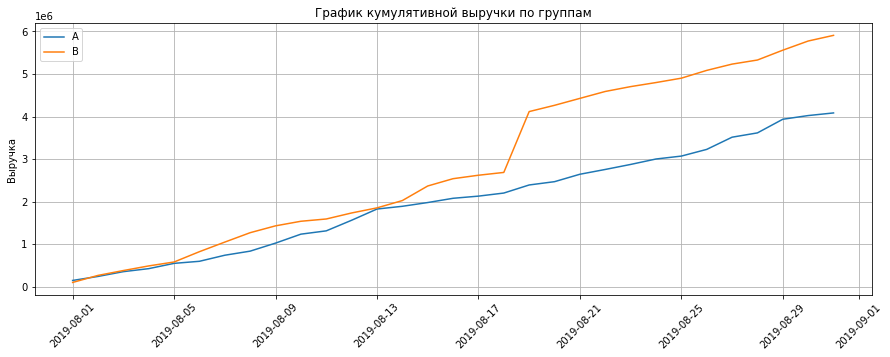

In [13]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']] # 5
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']] # 6

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A') # 7
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Исходя из графика можно сделать следующие выводы:
* Выручка растёт в обеих группах на протяжение всего теста.
* Группа B имеет бо́льшие темпы роста.
* 18 августа произошёл резкий скачок группы B, вероятнее всего причина в одном или нескольких заказах на крупные суммы.

### Построим график кумулятивного среднего чека по группам.

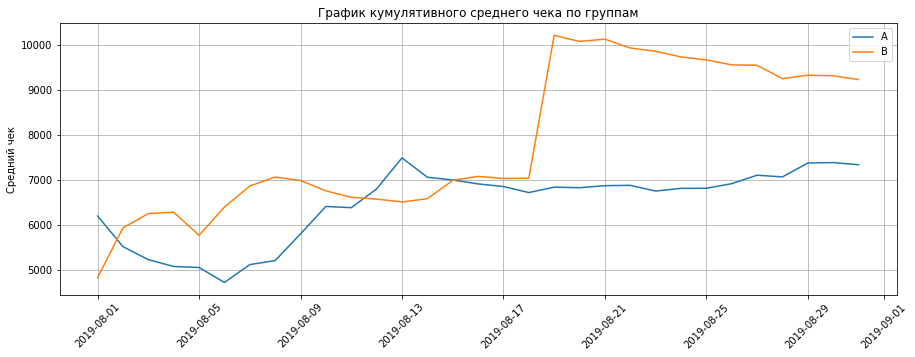

In [14]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Исходя из графика можно сделать следующие выводы:
* В первой половине эксперимента данные сильно колеблются.
* Группа B показала бо́льшие темпы роста.
* Как и на прошлом графике, можно обнаружить сильный скачок 18 августа.
* Темп роста группы А меньше, но более плавный
* После скачка в группе B, мы можем наблюдать нисходящую тенденцию

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

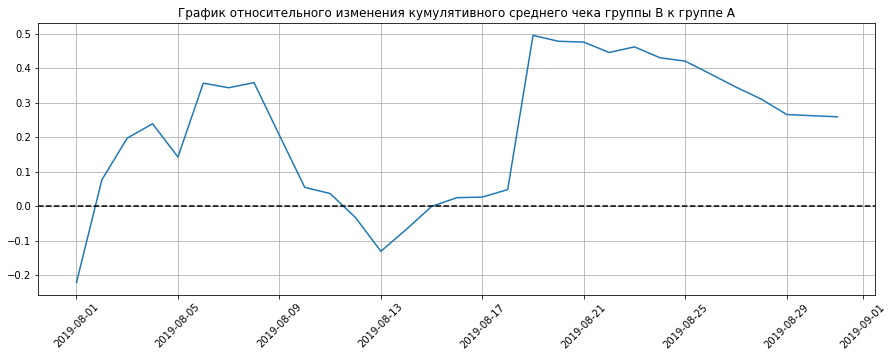

In [15]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'] # Объединим таблицы cumulativeRevenueA и cumulativeRevenueB
)

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.grid()
plt.show()

На графике мы можем видеть, что изменения кумулятивного среднего чека группы В к группе А достаточно резкие, это подтверждает предположение о влиянии крупных заказов на данные.

### Построим график кумулятивного среднего количества заказов на посетителя по группам.

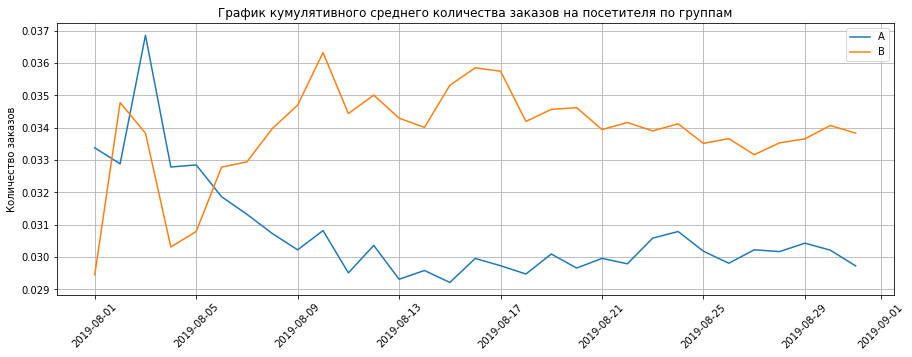

In [31]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors'] 
# добавим столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

cumulativeDataA = cumulativeData[cumulativeData['group']=='A'] # создадим переменную с данными о заказах группы А
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'] # создадим переменную с данными о заказах группы В

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Исходя из графика, можно сделать следующие выводы:
* В начале теста среднее количество заказов группы А выше, после чего она снизилась и зафиксировалась на одном уровне
* У группы В обратная ситуация
*  На протяжение всего эксперимента, начиная с 6 августа, среднее количество заказов на пользователя группы В выше, чем у группы А

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

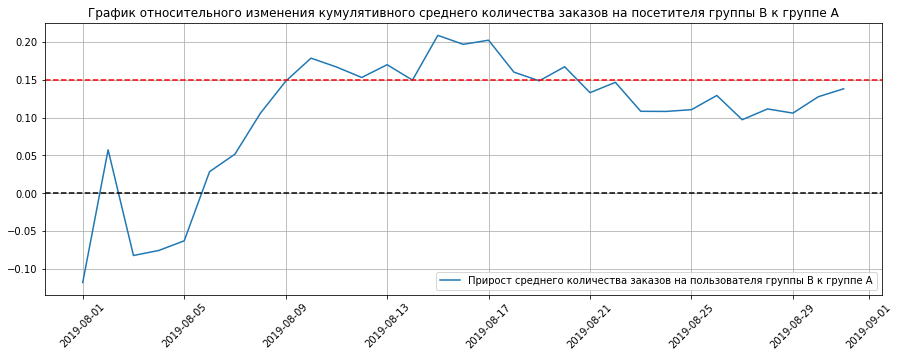

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
) # Объединим таблицы cumulativeDataA и cumulativeDataB

plt.figure(figsize=(15,5))
plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1, label="Прирост среднего количества заказов на пользователя группы B к группе A")

plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='red', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Исходя из графика, можно сделать вывод, что среднее количество заказов на пользователя группы В показывает себя лучше, достигая прироста в 15-20 процентов относительно группы А.

### Построим точечный график количества заказов по пользователям.

Создадим таблицу по заказам.

In [18]:
orders_by_users = orders.groupby(
    'visitor_id', as_index=False).agg({'transaction_id':'nunique'}).rename(columns={'transaction_id':'orders'}
)
orders_by_users.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


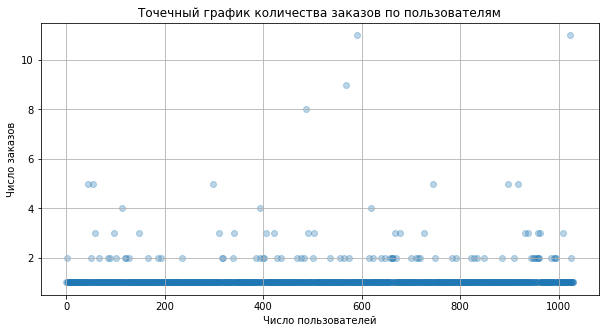

In [19]:
x_values = pd.Series(range(0,len(orders_by_users['orders'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.3)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Число пользователей')
plt.ylabel('Число заказов')
plt.grid()
plt.show()

Исходя из графика, можно сделать вывод, что большинство пользователей совершило один заказ, однако пользователей, совершивших 2 и 3 заказа тоже достаточно много.

#### Посчитаем процентили количества заказов на пользователя

In [20]:
print(np.percentile(orders_by_users['orders'], [90, 95, 99])) 

[1. 2. 4.]


Здесь мы можем наблюдать, что более 4 заказов оформили лишь 1 процент пользователей. Лишь 5 процентов пользователей оформили более 2 заказов, думаю наиболее рационально будет установить верхнюю границу для определения аномальных пользователей в 3 заказа.

### Построим точечный график стоимостей заказов.

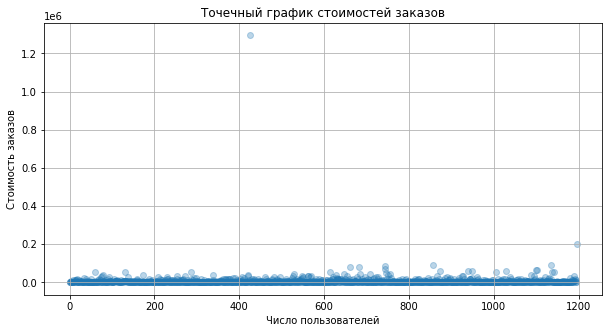

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

Для большей наглядности построим график, ограничив максимальное значение 100 тысячами.

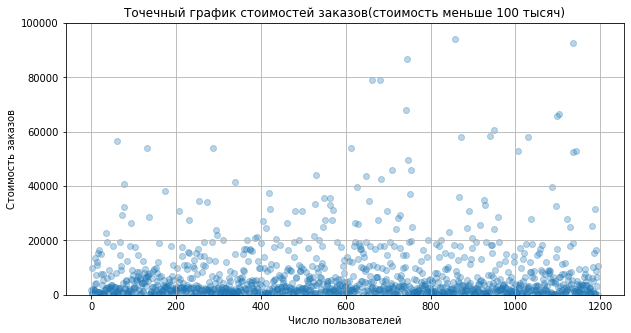

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.title('Точечный график стоимостей заказов(стоимость меньше 100 тысяч)')
plt.ylim(0, 100000)
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

Здесь мы можем наблюдать, что большинство пользователей совершает заказы стоимостью до 20 тысяч.

#### Посчитаем процентили стоимости заказов

In [23]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Лишь 1 процент пользователей совершают заказы стоимостью более 58 тысяч и лишь 5 процентов более 28 тысяч. Думаю будет рациональным установить границу в 30 тысяч.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [24]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

cummulative = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы:

Нулевая гипотеза: Среднее количество заказов на пользователя в группе A равно группе B (статистическая значимость не значительна и сделать вывод о различии нельзя)

Альтернативная гипотеза: Среднее количество заказов на пользователя в группе A не равно группе B (между выборками имеется статистическая значимость)

Применим критерием Манна-Уитни. Порогом статистической значимости установим alpha = 0.05

In [25]:
print('Статистическая значимость:','{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Значение относительного прироста:','{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Статистическая значимость: 0.017
Значение относительного прироста: 0.138


P-value значительно меньше 0.05, не получилось подтвердить нулевую гипотезу. Среднее количество заказов на пользователя в группе A не равно группе B (между выборками имеется статистическая значимость). Относительный прирост среднего группы В к группе А равен 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы:

Нулевая гипотеза: Средний чек в группе A равен группе B (статистическая значимость не значительна и сделать вывод о различии нельзя)

Альтернативная гипотеза: Средний чек в группе A не равен группе B (между выборками имеется статистическая значимость)

Применим критерием Манна-Уитни. Порогом статистической значимости установим alpha = 0.05

In [26]:
print('Статистическая значимость:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Значение относительного прироста:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Статистическая значимость: 0.729
Значение относительного прироста: 0.259


P-value значительно больше 0.05, не получилось отвергнуть нулевую гипотезу. Средний чек в группе A равен группе B (статистическая значимость не значительна и сделать вывод о различии нельзя).
Относительный прирост среднего чека группы В к группе А равен 25,9%. Что было заметно на графиках ранее.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

"Отчистим" данные от аномальных значений, ранее мы установили верхние границы в максимум 3 заказа на пользователя и на заказы не дороже 30 тысяч.

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)


usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Сформулируем гипотезы:

Нулевая гипотеза: Среднее количество заказов на пользователя в группе A равно группе B (статистическая значимость не значительна и сделать вывод о различии нельзя)

Альтернативная гипотеза: Среднее количество заказов на пользователя в группе A не равно группе B (между выборками имеется статистическая значимость)

Применим критерием Манна-Уитни. Порогом статистической значимости установим alpha = 0.05

In [28]:
print('Статистическая значимость:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Значение относительного прироста','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Статистическая значимость: 0.018
Значение относительного прироста 0.148


P-value значительно меньше 0.05, не получилось подтвердить нулевую гипотезу. Среднее количество заказов на пользователя в группе A не равно группе B (между выборками имеется статистическая значимость).
Относительный прирост среднего группы В к группе А равен 14,8%. Изменение по сравнению с прошлыми результатами 1%.
Подтвердили туже гипотезу, что и по "сырым" данным.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформулируем гипотезы:

Нулевая гипотеза: Средний чек в группе A равен группе B (статистическая значимость не значительна и сделать вывод о различии нельзя)

Альтернативная гипотеза: Средний чек в группе A не равен группе B (между выборками имеется статистическая значимость)

Применим критерием Манна-Уитни. Порогом статистической значимости установим alpha = 0.05

In [29]:
print(
    'Статистическая значимость','{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Значение относительного прироста','{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Статистическая значимость 0.958
Значение относительного прироста -0.020


P-value значительно больше 0.05, не получилось отвергнуть нулевую гипотезу. Средний чек в группе A равен группе B (статистическая значимость не значительна и сделать вывод о различии нельзя).
Относительное снижение среднего чека группы В к группе А  равен 2%. Изменение по сравнению с прошлыми результатами почти 27%.
Подтвердили туже гипотезу, что и по "сырым" данным.

## Решение по результатам теста.

В ходе теста удалось подтвердить следующие гипотезы:
* Среднее количество заказов на пользователя в группе A не равно группе B (между выборками имеется статистическая значимость) по сырым и по очищенным данным.
* Средний чек в группе A равен группе B (статистическая значимость не значительна и сделать вывод о различии нельзя) по сырым и по очищенным данным.

Среднее количество заказов на пользователя группы B  по итогам теста оказалось выше, чем у группы А, в свою очередь средний чек не имеет статистически важных различий между группами.
Исходя из чего тест можно остановить и зафиксировать победу группы B